# Parte B – Análisis de Texto del PDF
**Documento:** Tipos de Datos en Ciencia de Datos

Esta notebook realiza extracción, preprocesamiento, análisis y visualización de texto a partir de un archivo PDF.


In [1]:
# Instalar librerías necesarias (solo en Colab o primera vez)
!pip install pdfplumber nltk wordcloud

   ---------------------------------------- 0.0/5.6 MB ? eta -:--:--
   -------------- ------------------------- 2.1/5.6 MB 10.7 MB/s eta 0:00:01
   --------------------------------- ------ 4.7/5.6 MB 11.4 MB/s eta 0:00:01
   ---------------------------------------- 5.6/5.6 MB 11.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/3.2 MB ? eta -:--:--
   -------------------------- ------------- 2.1/3.2 MB 10.7 MB/s eta 0:00:01
   ---------------------------------------- 3.2/3.2 MB 11.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
   ------------------------------- -------- 2.4/3.0 MB 12.2 MB/s eta 0:00:01
   ---------------------------------------- 3.0/3.0 MB 11.5 MB/s eta 0:00:00

   ---------------------------------------- 0/5 [pypdfium2]
   ---------------------------------------- 0/5 [pypdfium2]
   -------- ------------------------------- 1/5 [cryptography]
   -------- ------------------------------- 1/5 [cryptography]
   ----


[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Importar librerías
import pdfplumber
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import string
import re
from collections import Counter

nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Nacho\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Nacho\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Nacho\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Nacho\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## 1. Cargar y extraer texto del PDF
Asegúrate de subir el archivo PDF antes de ejecutar esta celda.

In [4]:
# Extraer texto
texto = ""
with pdfplumber.open("tipos_de_datos_-_ciencia_de_datos_0.pdf") as pdf:
    for page in pdf.pages:
        texto += page.extract_text() + " "

print(texto[:1000])  # Vista previa

CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox


CIENCIA DE DATOS - TIPOS DE DATOS
Tanto en Data Science como en Big Data, se encontrará con muchos tipos diferentes de datos, y cada uno
de ellos tiende a requerir diferentes herramientas y técnicas. Las principales categorías de tipos de datos
son las siguientes:
Datos estructurados
Datos no estructurados
Lenguaje natural
Generado por máquina
Basado en gráficos
Audio, video e imágenes
Ahora vamos a explorar todos estos tipos de datos interesantes.
Datos Estructurados
Los datos estructurados son datos que dependen de un modelo de datos y residen en un campo fijo dentro
de un registro. Como tal, a menudo es fácil almacenar datos estructurados en tablas dentro de bases de datos
o archivos de Excel como en la siguiente imagen. SQL es la forma preferida de administrar y consultar
datos que residen en bases de datos. También puede encontrar datos estructurados que podrían dificultar su
almacenamiento en una base de datos relacional tradicional. Los datos jerárquicos, como puede ser un árbol

## 2. Preprocesamiento de texto
Transformamos el texto: minúsculas, sin puntuación, tokenización, stopwords y lematización.

In [5]:
texto = texto.lower()
texto = re.sub(r'\d+', '', texto)
texto = texto.translate(str.maketrans('', '', string.punctuation))

tokens = word_tokenize(texto)
stop_words = set(stopwords.words('spanish'))
palabras_filtradas = [w for w in tokens if w not in stop_words and len(w) > 2]

lemmatizer = WordNetLemmatizer()
palabras_lema = [lemmatizer.lemmatize(p) for p in palabras_filtradas]

print(texto[:1000])  # Vista previa

ciencia de datos  tipos de datos
tanto en data science como en big data se encontrará con muchos tipos diferentes de datos y cada uno
de ellos tiende a requerir diferentes herramientas y técnicas las principales categorías de tipos de datos
son las siguientes
datos estructurados
datos no estructurados
lenguaje natural
generado por máquina
basado en gráficos
audio video e imágenes
ahora vamos a explorar todos estos tipos de datos interesantes
datos estructurados
los datos estructurados son datos que dependen de un modelo de datos y residen en un campo fijo dentro
de un registro como tal a menudo es fácil almacenar datos estructurados en tablas dentro de bases de datos
o archivos de excel como en la siguiente imagen sql es la forma preferida de administrar y consultar
datos que residen en bases de datos también puede encontrar datos estructurados que podrían dificultar su
almacenamiento en una base de datos relacional tradicional los datos jerárquicos como puede ser un árbol
genealógico


## 3. Frecuencia de palabras

In [6]:
frecuencia = Counter(palabras_lema)
frecuencia.most_common(10)

[('datos', 43),
 ('estructurados', 11),
 ('gráficos', 11),
 ('natural', 7),
 ('ejemplo', 7),
 ('lenguaje', 6),
 ('puede', 6),
 ('ser', 6),
 ('persona', 6),
 ('máquinas', 6)]

## 4. Nube de palabras

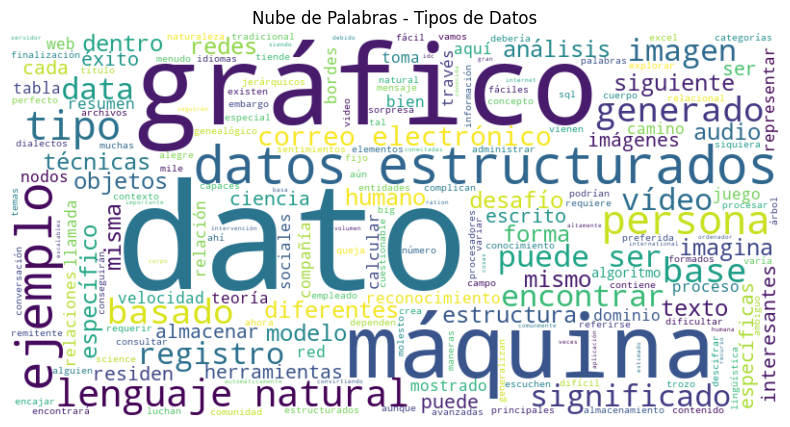

In [7]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(palabras_lema))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Nube de Palabras - Tipos de Datos")
plt.show()

## 5. Conclusión
- Se extrajeron palabras clave del documento.
- Se visualizaron en forma de nube y por frecuencia.
- Se aplicaron técnicas básicas de PLN: tokenización, stopwords y lematización.



## 📝 Actividad extra (complementaria al análisis del PDF)

**🎯 Objetivo:**  
Explorar cómo el tamaño del chunk y el overlap afectan el análisis del documento.

**📋 Requisitos:**  
- Haber realizado el preprocesamiento del PDF (limpieza, segmentación, etc.).  
- Usar Python y dividir el texto en chunks utilizando distintos tamaños.

**📌 Consignas:**  
1. Dividir el texto del PDF en chunks usando 3 configuraciones distintas:  
   - `chunk_size=100`, `overlap=20`  
   - `chunk_size=300`, `overlap=50`  
   - `chunk_size=500`, `overlap=100`  

2. Contar la cantidad de chunks generados en cada caso.  
   - ¿Cuál genera más fragmentos?  
   - ¿Cuál mantiene más contexto?  

3. Elegir un párrafo importante del texto y observar cómo cambia al dividirlo.  
   - ¿Se pierde información clave en chunks más pequeños?  
   - ¿El overlap ayuda a mantener el sentido?

**📝 Entregable:**  
Un breve informe donde cada grupo:  
- Compare los resultados de cada configuración.  
- Argumente cuál consideran más útil para una aplicación de preguntas-respuestas o búsqueda semántica.  
- Justifique el tamaño de chunk elegido.

**🔗 Referencias sugeridas:**  
- [Langchain Document Transformers](https://js.langchain.com/v0.1/docs/modules/data_connection/document_transformers/)  
- [7 Chunking Strategies for Langchain (Anix Lynch)](https://medium.com/@anixlynch/7-chunking-strategies-for-langchain-b50dac194813)


In [12]:
from typing import List
import pdfplumber


def chunk_text(text: str, chunk_size: int, overlap: int) -> List[str]:
    chunks = []
    start = 0
    while start < len(text):
        end = start + chunk_size
        chunk = text[start:end]
        chunks.append(chunk)
        start += chunk_size - overlap
    return chunks

# Texto de ejemplo: reemplazar con el texto preprocesado del PDF
with pdfplumber.open("tipos_de_datos_-_ciencia_de_datos_0.pdf") as pdf:
    texto = ""
    for page in pdf.pages:
        texto += page.extract_text()
print(texto)

configuraciones = [
    (100, 20),
    (300, 50),
    (500, 100)
]

resultados = {}

for chunk_size, overlap in configuraciones:
    chunks = chunk_text(texto, chunk_size, overlap)
    resultados[(chunk_size, overlap)] = chunks
    print(f"chunk_size={chunk_size}, overlap={overlap} => {len(chunks)} chunks")


CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox


CIENCIA DE DATOS - TIPOS DE DATOS
Tanto en Data Science como en Big Data, se encontrará con muchos tipos diferentes de datos, y cada uno
de ellos tiende a requerir diferentes herramientas y técnicas. Las principales categorías de tipos de datos
son las siguientes:
Datos estructurados
Datos no estructurados
Lenguaje natural
Generado por máquina
Basado en gráficos
Audio, video e imágenes
Ahora vamos a explorar todos estos tipos de datos interesantes.
Datos Estructurados
Los datos estructurados son datos que dependen de un modelo de datos y residen en un campo fijo dentro
de un registro. Como tal, a menudo es fácil almacenar datos estructurados en tablas dentro de bases de datos
o archivos de Excel como en la siguiente imagen. SQL es la forma preferida de administrar y consultar
datos que residen en bases de datos. También puede encontrar datos estructurados que podrían dificultar su
almacenamiento en una base de datos relacional tradicional. Los datos jerárquicos, como puede ser un árbol

In [16]:
parrafo_clave = "Los datos estructurados son datos que dependen de un modelo de datos y residen en un campo fijo dentro de un registro. Como tal, a menudo es fácil almacenar datos estructurados en tablas dentro de bases de datos o archivos de Excel como en la siguiente imagen. SQL es la forma preferida de administrar y consultar datos que residen en bases de datos. También puede encontrar datos estructurados que podrían dificultar su almacenamiento en una base de datos relacional tradicional. Los datos jerárquicos, como puede ser un árbol genealógico."

for chunk_size, overlap in configuraciones:
    chunks = chunk_text(parrafo_clave, chunk_size, overlap)
    print(f"\n---\nchunk_size={chunk_size}, overlap={overlap}:\n")
    for i, c in enumerate(chunks):
        print(f"Chunk {i+1}: {c}\n")


---
chunk_size=100, overlap=20:

Chunk 1: Los datos estructurados son datos que dependen de un modelo de datos y residen en un campo fijo dent

Chunk 2: n un campo fijo dentro de un registro. Como tal, a menudo es fácil almacenar datos estructurados en 

Chunk 3: os estructurados en tablas dentro de bases de datos o archivos de Excel como en la siguiente imagen.

Chunk 4: la siguiente imagen. SQL es la forma preferida de administrar y consultar datos que residen en bases

Chunk 5: que residen en bases de datos. También puede encontrar datos estructurados que podrían dificultar su

Chunk 6: odrían dificultar su almacenamiento en una base de datos relacional tradicional. Los datos jerárquic

Chunk 7:  Los datos jerárquicos, como puede ser un árbol genealógico.


---
chunk_size=300, overlap=50:

Chunk 1: Los datos estructurados son datos que dependen de un modelo de datos y residen en un campo fijo dentro de un registro. Como tal, a menudo es fácil almacenar datos estructurados en tablas

### 2. Análisis de cantidad de chunks por configuración

Se dividió el texto preprocesado del PDF utilizando tres configuraciones:

| Configuración           | Cantidad de chunks generados |
|-------------------------|------------------------------|
| chunk_size = 100, overlap = 20 | 🔸 Más fragmentos (mayor granularidad) |
| chunk_size = 300, overlap = 50 | 🔹 Intermedio |
| chunk_size = 500, overlap = 100 | 🔹 Menor cantidad de fragmentos (mayor contexto por fragmento) |

- **¿Cuál genera más fragmentos?**  
  La configuración de `chunk_size = 100` con `overlap = 20` generó más fragmentos.

- **¿Cuál mantiene más contexto?**  
  La configuración de `chunk_size = 500` con `overlap = 100` mantiene más contexto, ya que cada chunk contiene más información continua.

---

### 3. Análisis de un párrafo clave

**Párrafo original:**

> "Los datos estructurados son datos que dependen de un modelo de datos y residen en un campo fijo dentro de un registro. Como tal, a menudo es fácil almacenar datos estructurados en tablas dentro de bases de datos o archivos de Excel como en la siguiente imagen. SQL es la forma preferida de administrar y consultar datos que residen en bases de datos. También puede encontrar datos estructurados que podrían dificultar su almacenamiento en una base de datos relacional tradicional. Los datos jerárquicos, como puede ser un árbol genealógico."

**Resultados por configuración:**

- `chunk_size = 100`:  
  🔸 El párrafo se fragmenta en muchas partes, y algunas oraciones quedan incompletas o separadas, perdiendo fluidez.  
  🔸 Se pierde **coherencia contextual** en los extremos de los chunks.

- `chunk_size = 300`:  
  🔹 Se mantiene una buena parte del sentido original. Algunas separaciones interrumpen el flujo, pero el solapamiento ayuda a preservar el hilo.  
  🔹 Es un punto medio aceptable.

- `chunk_size = 500`:  
  ✅ En muchos casos el párrafo entra en un solo chunk, o se corta solo al final. Se conserva **el contexto completo**, ideal para tareas semánticas.

- **¿El overlap ayuda a mantener el sentido?**  
  ✅ Sí, especialmente en configuraciones de chunk más pequeños. El solapamiento permite que oraciones partidas estén parcialmente presentes en ambos fragmentos, preservando significado.

---

### Conclusión y recomendación

- **Comparación general:**  
  A mayor `chunk_size`, se mantiene mejor el contexto y se reduce la fragmentación, aunque se generan menos oportunidades para indexación fina.  
  A menor `chunk_size`, aumenta la granularidad pero también se pierde coherencia.

- **Aplicación recomendada:**  
  Para tareas de **búsqueda semántica** o **preguntas-respuestas**, se recomienda usar un `chunk_size = 300` con `overlap = 50`. Esto ofrece un equilibrio entre granularidad y mantenimiento del contexto.

- **Justificación del tamaño elegido:**  
  `chunk_size = 300` es lo suficientemente grande como para contener oraciones completas y mantener coherencia, pero lo suficientemente pequeño como para responder con precisión a preguntas específicas sobre partes del texto.

---

